# Vocab Analysis
## Section 3: Analyze the Data

### 1. Import necessary libraries

In [332]:
# %load da_vocab_utility.py
# TDD backbone assertion to confirm a function call returns the desired result
def assertEquals(actual, expected, desc):
    assert(actual==expected), desc + " result: " + str(actual) + ", expected: " + str(expected)
    return "OK"
	
# check that two lists have the same contents
def lists_equal(a,b):
    return (a == b).all()
	

# shallow check (by row) for duplicates
def has_dupes(df_in):
    dupe = df_in.duplicated()
    return df_in.loc[dupe].shape[0] != 0
	
def print_line_break():
    print("-"*75)
	
def print_before_after(b, a, t=""):
    if t != "":
        print_line_break()
        print(t)
    print_line_break()
    print("Before: " + str(b))
    print_line_break()
    print("After: " + str(a))
    print_line_break()
	
def time_it(func, *args, **kwargs):
    start = time.time()
    func(*args, **kwargs)
    end = time.time()
    # https://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python
    print("{:.0f}".format((end - start)*1000) + " miliseconds")
	
def has_dupe_terms(df_in):
    location = df_in['Term'].duplicated()
    return df_in.loc[location].shape[0] != 0
	
def get_rows_by_value_in_col(df_in, value, col):
    return df_in.loc[df_in[col]==value]
	
# Converts a tag string to a list to a set back to a string (this removes the duplicates)
def remove_dupes(t):
    temp = list(set(t.lower().split()))
    return ' '.join(temp) # return as string
	
# determines if an individual tag substring exists in a larger tags list string
def tag_exists(tags, tag):
    return 1 if tag in tags.split() else 0
	
def is_blank (s):
    return not (s and s.strip())
	
def get_frame_of_cards_by_term(df, t):
    return df.loc[df['Term']==t]
	

In [333]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [334]:
# show all columns
pd.options.display.max_columns = None

### 2. Import necessary datasets

In [335]:
# https://stackoverflow.com/questions/36977223/how-should-i-read-a-csv-file-without-the-unnamed-row-with-pandas?noredirect=1&lq=1
# import notes
notes_location = "datasets/df_notes_015_final_section_2.csv"
df_notes = pd.read_csv(notes_location, index_col=[0])

# import cards
cards_location = "datasets/df_cards_009_mid_section_2.csv"
df_cards = pd.read_csv(cards_location, index_col=[0])

# todo: import revlog

In [336]:
df_notes.head()

,nid,tags,Term,Yomi1,NoteCreated,LastModified,commonword,clothing,animal,body,food,place,textbook,college,fromdict,fromexam,n1,n2,n3,n4,n5,katakana,hiragana,kanji,adv,adj,noun,verb,nonconvo,convo,metalite,hasSimilarSound,hasSameSound,hasVisual,hasAudio,hasMultiMeaning,hasMultiReading,hasSimilarMeaning,hasAltForm,hasRichExamples,TermLen,Syllables,TermLenGroup,SyllablesGroup,jlpt_lvl_d,script,mean_ivl,mean_factor,mean_reps,mean_lapses,total_reps,total_lapses,hasListenCard,hasPictureCard,hasReadCard,hasTranslateCard,mean_note_waste,mean_note_roi,n_ivl_q,n_factor_q,n_waste_q,n_roi_q
0,1331799797112,kanji commonword noun n2,隙間,すきま,2012-03-15 08:23:17.112,2019-05-18 14:33:12.000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,2,3,[2],[3:4],2.0,kanji,76.5,2245.0,4.5,0.5,9,1,0,0,1,1,0.111111,17.000000,0,2,0,2
2,1331799797114,kanji commonword suruverb fromdict noun,移籍,いせき,2012-03-15 08:23:17.114,2019-05-18 12:54:16.000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,[2],[3:4],NaN,kanji,99.0,1980.0,7.0,0.0,7,0,0,0,1,0,0.000000,14.142857,0,1,0,1
3,1331799797117,kanji commonword transitive n2 fromdict verb,吊るす,つるす,2012-03-15 08:23:17.117,2019-05-18 14:33:12.000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,3,3,[3:4],[3:4],2.0,kanji,73.5,2270.0,5.0,0.5,10,1,0,0,1,1,0.100000,14.700000,0,2,0,1
5,1331799797118,convo commonword kanji n1 fromdict naadjective...,和やか,なごやか,2012-03-15 08:23:17.118,2019-05-18 12:54:16.000,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,3,4,[3:4],[3:4],1.0,kanji,38.0,2145.0,9.5,1.5,19,3,0,0,1,1,0.157895,4.000000,0,2,0,0
7,1331799797121,kanji fromdict,営業日,えいぎょうび,2012-03-15 08:23:17.121,2019-05-18 12:54:16.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6,[3:4],[5:8],NaN,kanji,132.0,2130.0,6.0,1.0,6,1,0,0,1,0,0.166667,22.000000,0,2,0,2


In [337]:
print(df_notes.TermLenGroup.unique())
print(df_notes.SyllablesGroup.unique())
print(df_notes.script.unique())

['[2]' '[3:4]' '[5:8]' '[1]' '[9: ]']
['[3:4]' '[5:8]' '[9: ]' '[2]' '[1]']
['kanji' 'katakana' 'hiragana' nan]


In [338]:
df_cards.head()

,cid,nid,ivl,factor,reps,lapses,CardCreated,DueDate,c_ivl_q,c_factor_q,CardType_listen,CardType_look,CardType_read,CardType_recall,cardtype,waste,roi
1,1331799797112,1331799797112,149,2080,8,1,2012-03-15 08:23:17.112,2015-03-03 09:00:00.000,0,2,0,0,1,0,read,0.125000,18.625000
3,1331799797114,1331799797114,99,1980,7,0,2012-03-15 08:23:17.114,2015-02-04 09:00:00.000,0,1,0,0,1,0,read,0.000000,14.142857
4,1331799797116,1331799797116,54,1680,20,4,2012-03-15 08:23:17.116,2015-01-22 09:00:00.000,0,1,0,0,1,0,read,0.200000,2.700000
5,1331799797117,1331799797117,143,2130,6,1,2012-03-15 08:23:17.117,2015-03-17 09:00:00.000,0,2,0,0,1,0,read,0.166667,23.833333
6,1331799797118,1331799797118,74,1880,15,3,2012-03-15 08:23:17.118,2015-02-06 09:00:00.000,0,1,0,0,1,0,read,0.200000,4.933333


### 3. Observe Metadata (tag) Frequency:

In [339]:
tag_freq = pd.Series(' '.join(df_notes.tags).split()).value_counts()

In [340]:
tag_freq.head(20)

kanji                   4538
textbook                2098
fromdict                1321
metalite                1305
verb                     921
fromtest                 894
hasrobo                  567
commonword               474
college                  443
hiragana                 393
fromexam                 366
katakana                 364
numeric                  338
noun                     336
semester1                292
addsimilar               236
checked                  223
usuallywritteninkana     221
n3                       191
convo                    187
dtype: int64

In [341]:
tag_freq.head(60)[20:]

media           186
counter         159
transitive      142
lyrics          138
adj             135
iadj            135
n5              135
place           131
intransitive    104
technical       101
multimeaning    100
n4               99
hassame          88
n2               82
gairaigo         81
multireading     68
n1               67
onomatopoeic     66
animal           64
geography        63
haskanji         63
body             60
adv              56
noadjective      55
food             53
name             48
type5r           48
culture          48
number           42
multiterm        40
multiwriting     39
suruverb         39
naadjective      37
people           37
mergeterms       36
suffix           36
ghibli           35
inspect          35
waseigo          35
math             35
dtype: int64

# Initial Observations

Looks like our data is ready for some proper inspection! What are some questions that we might ask of this dataset? We could start with some simple/basic broad/overview observations about the (condensed) dataset such as:
- How many terms (unique notes) exist?
- How many study vectors (unique card types) exist (were utilized by student A)?
- When did student A first start studying?
- What is the data distribution for reps count? For laspes count?
- Of the terms that exist, how many had audio data?
- Of the terms that exist, how many had image data?

In [342]:
# unique terms in the condensed dataset
len(df_notes['Term'].unique())

6679

In [343]:
# confirm what card types exist
df_cards['cardtype'].value_counts()

read      6920
look      1131
listen      26
recall      18
Name: cardtype, dtype: int64

In [344]:
#pd_crt # datetime of collection creation (studying commenced from this date)

In [345]:
print(df_cards.shape)

(8095, 17)


In [346]:
print(df_notes.shape)

(6679, 62)


# Define features

In [347]:
#components of binary list (cards)
type_list = ['CardType_listen','CardType_look','CardType_read','CardType_recall']

In [348]:
#components of binary list (notes, combo)
genre_list = ['clothing','animal','body','food','place']

source_list = ['fromdict','fromexam','textbook','college']

convo_list = ['convo','nonconvo']

jlpt_list = ['n1','n2','n3','n4','n5']

pos_list = ['noun','verb','adj','adv']

char_list = ['katakana','hiragana','kanji']

has_list = ['hasVisual','hasAudio','hasMultiMeaning','hasMultiReading','hasSimilarSound','hasSameSound',
    'hasSimilarMeaning','hasAltForm','hasRichExamples']

card_list = ['hasListenCard','hasPictureCard','hasReadCard','hasTranslateCard']

other_list = ['commonword','metalite']

In [349]:
#components of continuous list
len_list = ['TermLen','Syllables']

study_data_list = ['mean_ivl','mean_factor','mean_reps','mean_lapses',
                   'total_reps','total_lapses']

In [350]:
binary_list = list(genre_list + source_list + jlpt_list +
    pos_list + char_list + has_list + other_list + convo_list) #card_list

continuous_list = list(len_list + study_data_list)

discrete_non_binary_list = ['NoteCreated','LastModified','TermLenGroup','SyllablesGroup','jlpt_lvl_d']

In [351]:
numeric_note_fields = ['mean_ivl','mean_factor','mean_reps','mean_lapses',
                       'total_reps','total_lapses']

mean_card_fields = ['mean_card_waste','mean_card_roi']

In [352]:
note_quintiles = ['n_ivl_q','n_factor_q','n_waste_q','n_roi_q']

In [353]:
#show correlation of stats via heatmap
df_cards_001_corr = df_cards.copy()
df_cards_001_corr = df_cards_001_corr.drop(["cid","nid",'c_ivl_q','c_factor_q','ivl','factor','reps','lapses'], axis=1)

# Inspect card correlations visually

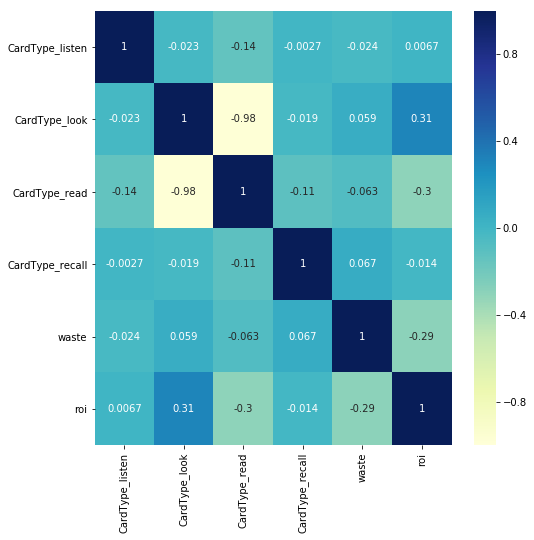

In [354]:
corr_card = df_cards_001_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax_card = sns.heatmap(corr_card, vmin=-1, cmap="YlGnBu", annot=True)

# Inspect note correlations visually

In [355]:
#show correlation of stats via heatmap
df_notes_001_corr = df_notes.copy()
df_notes_001_corr = df_notes_001_corr.drop(list(
    ["nid",'jlpt_lvl_d'] +
    card_list + convo_list + numeric_note_fields + genre_list + 
    source_list + jlpt_list + char_list + has_list + 
    other_list + len_list + note_quintiles), axis=1)

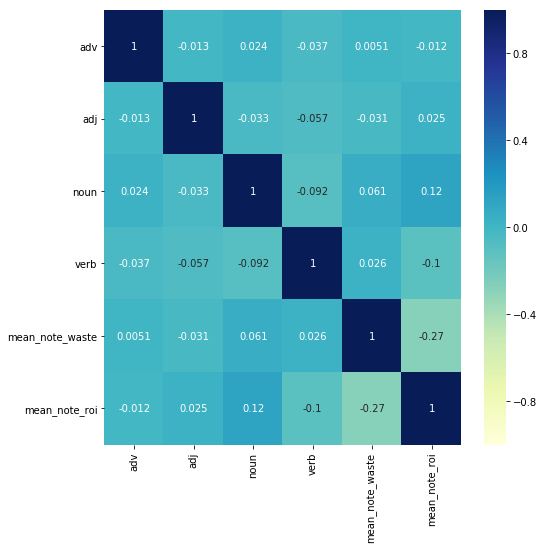

In [356]:
# Inspect the correlation between word type & mean note ROI & mean note waste
corr = df_notes_001_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(corr, vmin=-1, cmap="YlGnBu", annot=True)

In [357]:
df_notes_002_corr = df_notes.copy()
df_notes_002_corr = df_notes_002_corr.drop(list(
    ["nid","total_reps","total_lapses"] + 
    numeric_note_fields + source_list + convo_list + pos_list + len_list + other_list + 
    has_list + genre_list + jlpt_list + card_list + note_quintiles + ['jlpt_lvl_d','mean_factor']), axis=1)

# Inspect correlations by script

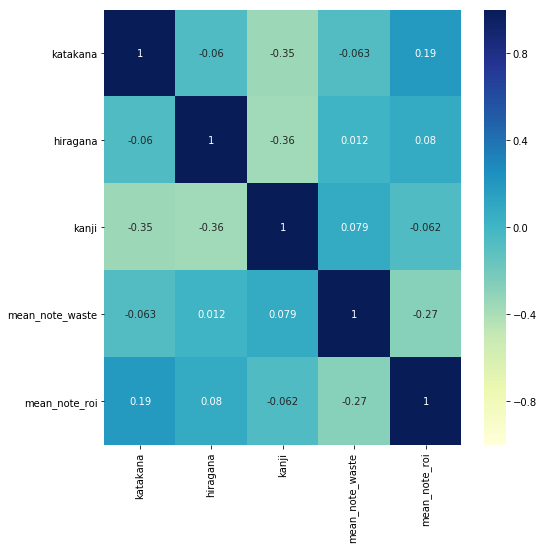

In [358]:
#show correlation of stats via heatmap
corr2 = df_notes_002_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax2 = sns.heatmap(corr2, vmin=-1, cmap="YlGnBu", annot=True)

In [359]:
df_notes_003_corr = df_notes.copy()
df_notes_003_corr = df_notes_003_corr.drop(list(
    ["nid","total_reps","total_lapses",'jlpt_lvl_d','mean_factor'] + 
    numeric_note_fields + convo_list + char_list + pos_list + len_list + other_list + 
    has_list + genre_list + jlpt_list + card_list + note_quintiles), axis=1)

# Inspect correlations by word first encounter

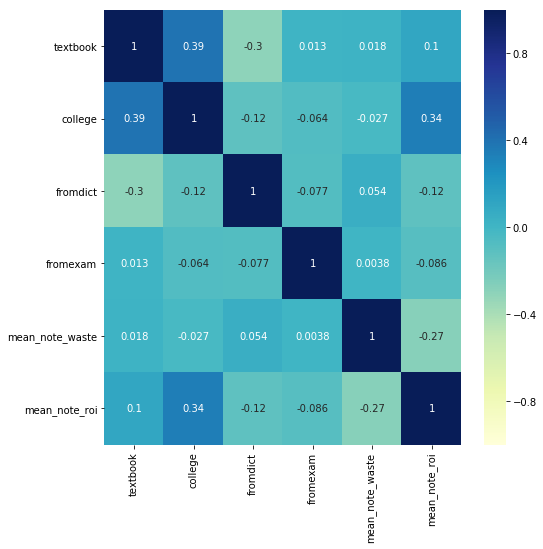

In [360]:
#show correlation of stats via heatmap
corr3 = df_notes_003_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax3 = sns.heatmap(corr3, vmin=-1, cmap="YlGnBu", annot=True)

In [361]:
df_notes_004_corr = df_notes.copy()
df_notes_004_corr = df_notes_004_corr.drop(list(
    ["nid","total_reps","total_lapses",'jlpt_lvl_d','mean_factor',
     'commonword'] + numeric_note_fields + char_list + source_list + 
    pos_list + len_list + has_list + genre_list + jlpt_list + card_list + note_quintiles), axis=1)

# Inspect correlation of convo ok'd vs not, & metadata poorness

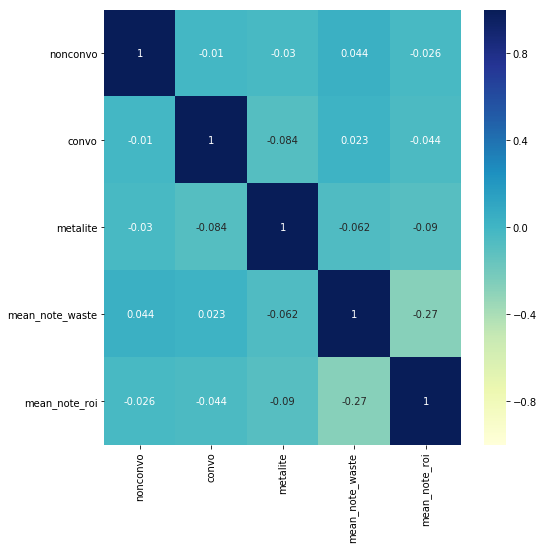

In [362]:
#show correlation of stats via heatmap
corr4 = df_notes_004_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax4 = sns.heatmap(corr4, vmin=-1, cmap="YlGnBu", annot=True)

# Inspect field data correlations

In [363]:
df_notes_005_corr = df_notes.copy()
df_notes_005_corr = df_notes_005_corr.drop(list(
    ["nid","total_reps","total_lapses",'jlpt_lvl_d','mean_factor',
     'metalite']+other_list+convo_list+char_list+numeric_note_fields+
    source_list+pos_list+len_list+genre_list+jlpt_list+card_list + note_quintiles), axis=1)

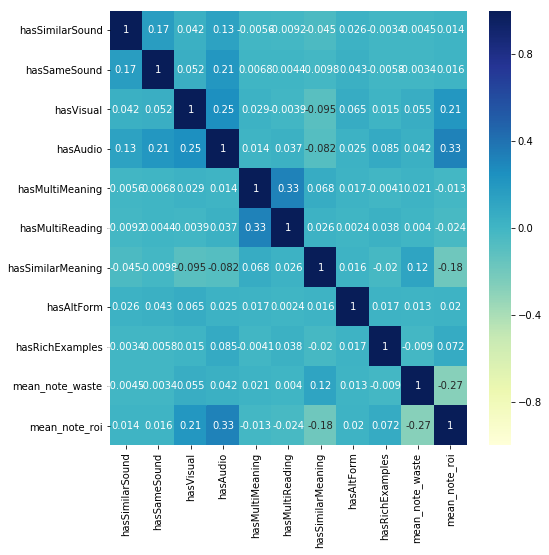

In [364]:
#show correlation of stats via heatmap
corr5 = df_notes_005_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax5 = sns.heatmap(corr5, vmin=-1, cmap="YlGnBu", annot=True)

In [365]:
df_cards_002_describe = df_cards.copy()
df_cards_002_describe = df_cards_002_describe.drop(list(["cid","nid",'c_ivl_q','c_factor_q']+type_list), axis=1)

df_cards_002_describe.describe()

,ivl,factor,reps,lapses,waste,roi
count,8095.000000,8095.000000,8095.000000,8095.000000,8095.000000,8095.000000
mean,425.414824,1797.611118,14.518098,0.548734,0.023062,44.447416
std,465.932765,414.151798,9.015904,1.127553,0.040319,62.643062
min,1.000000,1300.000000,1.000000,0.000000,0.000000,0.008850
25%,166.000000,1300.000000,9.000000,0.000000,0.000000,10.466667
50%,258.000000,1770.000000,12.000000,0.000000,0.000000,22.500000
75%,497.000000,2200.000000,17.000000,1.000000,0.047619,49.181818
max,4514.000000,2950.000000,113.000000,16.000000,0.333333,752.333333


In [366]:
df_cards_002_describe.corr()

,ivl,factor,reps,lapses,waste,roi
ivl,1.000000,0.414551,-0.267124,-0.248761,-0.265965,0.897400
factor,0.414551,1.000000,-0.693708,-0.415336,-0.344352,0.547501
reps,-0.267124,-0.693708,1.000000,0.838444,0.588538,-0.389360
lapses,-0.248761,-0.415336,0.838444,1.000000,0.826153,-0.277162
waste,-0.265965,-0.344352,0.588538,0.826153,1.000000,-0.292487
roi,0.897400,0.547501,-0.389360,-0.277162,-0.292487,1.000000


# Plot ROI trends for cards using linear regression

In [367]:
import numpy as np
import statsmodels.formula.api as smf

In [368]:
#OLS is Ordinary Least Squares, the most common type of linear regression
#the fit function uses the predictive values to calculate the best linear regression line
result = smf.ols('roi ~ ivl + factor - 1', data=df_cards).fit()

In [369]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roi   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                 2.625e+04
Date:                Sat, 18 May 2019   Prob (F-statistic):               0.00
Time:                        11:24:44   Log-Likelihood:                -38481.
No. Observations:                8095   AIC:                         7.697e+04
Df Residuals:                    8093   BIC:                         7.698e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ivl            0.1154      0.001    160.519      0.000       0.114       0.117
factor        -0.0010      0.000     -4.051      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     6253.613   Durbin-Watson:                   1.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           287833.221
Skew:                           3.291   Prob(JB):                         0.00
Kurtosis:                      31.461   Cond. No.                         4.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Plot ROI trends for notes using linear regression (using everything)

In [370]:
#OLS is Ordinary Least Squares, the most common type of linear regression
#the fit function uses the predictive values to calculate the best linear regression line
result = smf.ols('mean_note_roi ~ Syllables + TermLen + mean_ivl + mean_factor + mean_reps + mean_lapses + total_reps + total_lapses - 1', data=df_notes).fit()

In [371]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          mean_note_roi   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     6912.
Date:                Sat, 18 May 2019   Prob (F-statistic):               0.00
Time:                        11:24:44   Log-Likelihood:                -30311.
No. Observations:                6679   AIC:                         6.064e+04
Df Residuals:                    6671   BIC:                         6.069e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Syllables       -0.6892      0.227     -3.031      0.002      -1.135      -0.243
TermLen          1.1341      0.315      3.597      0.000       0.516       1.752
mean_ivl         0.1169      0.001    147.954      0.000       0.115       0.118
mean_factor      0.0092      0.000     20.449      0.000       0.008       0.010
mean_reps       -0.8170      0.100     -8.144      0.000      -1.014      -0.620
mean_lapses      6.8481      1.408      4.863      0.000       4.087       9.609
total_reps      -0.9644      0.081    -11.967      0.000      -1.122      -0.806
total_lapses     3.3909      1.245      2.725      0.006       0.951       5.831
==============================================================================
Omnibus:                     6551.017   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           704068.414
Skew:                           4.506   Prob(JB):                         0.00
Kurtosis:                      52.485   Cond. No.                     1.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Plot ROI trends for notes using linear regression

In [372]:
#OLS is Ordinary Least Squares, the most common type of linear regression
#the fit function uses the predictive values to calculate the best linear regression line
result = smf.ols('mean_note_roi ~ Syllables + TermLen + mean_ivl + mean_factor + mean_lapses - 1', data=df_notes).fit()

In [373]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          mean_note_roi   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     8289.
Date:                Sat, 18 May 2019   Prob (F-statistic):               0.00
Time:                        11:24:44   Log-Likelihood:                -31157.
No. Observations:                6679   AIC:                         6.232e+04
Df Residuals:                    6674   BIC:                         6.236e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Syllables      -3.1180      0.249    -12.532      0.000      -3.606      -2.630
TermLen         1.3177      0.358      3.685      0.000       0.617       2.019
mean_ivl        0.1127      0.001    130.338      0.000       0.111       0.114
mean_factor     0.0051      0.000     10.269      0.000       0.004       0.006
mean_lapses    -3.9282      0.286    -13.757      0.000      -4.488      -3.368
==============================================================================
Omnibus:                     6254.115   Durbin-Watson:                   1.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           507006.975
Skew:                           4.264   Prob(JB):                         0.00
Kurtosis:                      44.823   Cond. No.                     2.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Plot waste trends for notes using linear regression

In [374]:
#OLS is Ordinary Least Squares, the most common type of linear regression
#the fit function uses the predictive values to calculate the best linear regression line
result = smf.ols('mean_note_waste ~ mean_ivl + mean_factor - 1', data=df_notes).fit()

In [375]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        mean_note_waste   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     980.7
Date:                Sat, 18 May 2019   Prob (F-statistic):               0.00
Time:                        11:24:45   Log-Likelihood:                 11947.
No. Observations:                6679   AIC:                        -2.389e+04
Df Residuals:                    6677   BIC:                        -2.388e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
mean_ivl    -2.179e-05   1.32e-06    -16.469      0.000   -2.44e-05   -1.92e-05
mean_factor  1.611e-05   4.07e-07     39.579      0.000    1.53e-05    1.69e-05
==============================================================================
Omnibus:                     2112.216   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6601.823
Skew:                           1.629   Prob(JB):                         0.00
Kurtosis:                       6.621   Cond. No.                         5.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**reps** = work done to remember a card  
**interval** = memory length as output of memorization work done  
**ease/factor** = indicator of effort to retreive & store memory  
**lapses** = result of memory deficit, a common side-effect & indicator of inefficiency of memorization efforts  

**lapses/reps ratio** (waste ratio) => the closer to 0, the better ("low waste"). the higher this is, the worse : "high waste"  
**interval/reps ratio** (ROI ratio) = the higher the better ("low effort" / "sticky"). the lower this is, the worse ("high effort", "slippery")  

In [376]:
df_notes_006_corr = df_notes.copy()
df_notes_006_corr = df_notes_006_corr.drop(list(binary_list + card_list + ['nid','jlpt_lvl_d']), axis=1)

In [377]:
df_notes_006_corr.describe()

,TermLen,Syllables,mean_ivl,mean_factor,mean_reps,mean_lapses,total_reps,total_lapses,mean_note_waste,mean_note_roi,n_ivl_q,n_factor_q,n_waste_q,n_roi_q
count,6679.000000,6679.000000,6679.000000,6679.000000,6679.000000,6679.000000,6679.000000,6679.000000,6679.000000,6679.000000,6679.000000,6679.000000,6679.0,6679.000000
mean,2.660728,4.163348,395.283550,1790.411963,14.552428,0.545790,16.986525,0.643659,0.023729,40.379830,1.995508,0.966163,0.0,1.999701
std,1.216661,1.668767,403.103745,402.511299,8.673043,1.086683,11.435489,1.252366,0.039424,55.922390,1.416217,0.796476,0.0,1.414319
min,1.000000,1.000000,1.000000,1300.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.008850,0.000000,0.000000,0.0,0.000000
25%,2.000000,3.000000,168.000000,1320.250000,9.000000,0.000000,9.000000,0.000000,0.000000,10.666667,1.000000,0.000000,0.0,1.000000
50%,2.000000,4.000000,262.000000,1761.000000,12.500000,0.000000,14.000000,0.000000,0.000000,22.076923,2.000000,1.000000,0.0,2.000000
75%,3.000000,5.000000,472.000000,2150.000000,17.500000,1.000000,21.000000,1.000000,0.047619,45.894444,3.000000,2.000000,0.0,3.000000
max,15.000000,30.000000,4514.000000,2950.000000,113.000000,16.000000,113.000000,16.000000,0.333333,752.333333,4.000000,2.000000,0.0,4.000000


In [378]:
df_notes_006_corr.corr()

,TermLen,Syllables,mean_ivl,mean_factor,mean_reps,mean_lapses,total_reps,total_lapses,mean_note_waste,mean_note_roi,n_ivl_q,n_factor_q,n_waste_q,n_roi_q
TermLen,1.000000,0.684599,-0.029362,0.080908,-0.132085,-0.108267,-0.148674,-0.116799,-0.088335,0.018883,0.043351,0.079478,NaN,0.089140
Syllables,0.684599,1.000000,-0.096979,-0.011805,-0.039016,-0.047574,-0.066294,-0.055475,-0.047335,-0.073123,-0.055701,-0.015332,NaN,-0.035065
mean_ivl,-0.029362,-0.096979,1.000000,0.419931,-0.274262,-0.242044,-0.122451,-0.209175,-0.240729,0.884563,0.734650,0.392780,NaN,0.686750
mean_factor,0.080908,-0.011805,0.419931,1.000000,-0.692960,-0.404963,-0.560196,-0.382270,-0.323648,0.547652,0.445409,0.945978,NaN,0.683560
mean_reps,-0.132085,-0.039016,-0.274262,-0.692960,1.000000,0.836414,0.842213,0.798542,0.586422,-0.396625,-0.372472,-0.668335,NaN,-0.620216
mean_lapses,-0.108267,-0.047574,-0.242044,-0.404963,0.836414,1.000000,0.705684,0.949979,0.824611,-0.271301,-0.365932,-0.390574,NaN,-0.507419
total_reps,-0.148674,-0.066294,-0.122451,-0.560196,0.842213,0.705684,1.000000,0.811012,0.533746,-0.287774,-0.156230,-0.522378,NaN,-0.428013
total_lapses,-0.116799,-0.055475,-0.209175,-0.382270,0.798542,0.949979,0.811012,1.000000,0.808536,-0.260958,-0.304003,-0.362179,NaN,-0.468848
mean_note_waste,-0.088335,-0.047335,-0.240729,-0.323648,0.586422,0.824611,0.533746,0.808536,1.000000,-0.273438,-0.341619,-0.302558,NaN,-0.476690
mean_note_roi,0.018883,-0.073123,0.884563,0.547652,-0.396625,-0.271301,-0.287774,-0.260958,-0.273438,1.000000,0.624329,0.499812,NaN,0.664229


In [379]:
get_rows_by_value_in_col(df_notes, 1523892839900, 'nid')

,nid,tags,Term,Yomi1,NoteCreated,LastModified,commonword,clothing,animal,body,food,place,textbook,college,fromdict,fromexam,n1,n2,n3,n4,n5,katakana,hiragana,kanji,adv,adj,noun,verb,nonconvo,convo,metalite,hasSimilarSound,hasSameSound,hasVisual,hasAudio,hasMultiMeaning,hasMultiReading,hasSimilarMeaning,hasAltForm,hasRichExamples,TermLen,Syllables,TermLenGroup,SyllablesGroup,jlpt_lvl_d,script,mean_ivl,mean_factor,mean_reps,mean_lapses,total_reps,total_lapses,hasListenCard,hasPictureCard,hasReadCard,hasTranslateCard,mean_note_waste,mean_note_roi,n_ivl_q,n_factor_q,n_waste_q,n_roi_q
7786,1523892839900,kanji commonword noun n5,万年筆,まんねんひつ,2018-04-16 15:33:59.900,2019-05-18 12:54:16.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,3,6,[3:4],[5:8],5.0,kanji,276.333333,2156.666667,9.333333,1.333333,28,4,0,1,1,1,0.142857,29.607143,2,2,0,3


In [380]:
get_rows_by_value_in_col(df_cards, 1523892839900, 'nid')

,cid,nid,ivl,factor,reps,lapses,CardCreated,DueDate,c_ivl_q,c_factor_q,CardType_listen,CardType_look,CardType_read,CardType_recall,cardtype,waste,roi
18800,1523893083493,1523892839900,420,2210,7,1,2018-04-16 15:38:03.493,2020-06-28 09:00:00.000,3,2,0,0,1,0,read,0.142857,60.000000
18802,1523893129423,1523892839900,405,2210,7,1,2018-04-16 15:38:49.423,2020-06-13 09:00:00.000,3,2,0,0,0,1,recall,0.142857,57.857143
18803,1524841320859,1523892839900,4,2050,14,2,2018-04-27 15:02:00.859,2019-05-05 09:00:00.000,0,1,0,1,0,0,look,0.142857,0.285714


In [381]:
df_notes_n_corr = df_notes.copy()
df_notes_n_corr = df_notes_n_corr.drop(list(binary_list + card_list + 
    ['nid','tags','Term','Yomi1','jlpt_lvl_d','total_reps','total_lapses',
     'mean_note_waste']), axis=1)

In [382]:
df_notes_n_corr.columns.values

array(['NoteCreated', 'LastModified', 'TermLen', 'Syllables',
       'TermLenGroup', 'SyllablesGroup', 'script', 'mean_ivl',
       'mean_factor', 'mean_reps', 'mean_lapses', 'mean_note_roi',
       'n_ivl_q', 'n_factor_q', 'n_waste_q', 'n_roi_q'], dtype=object)

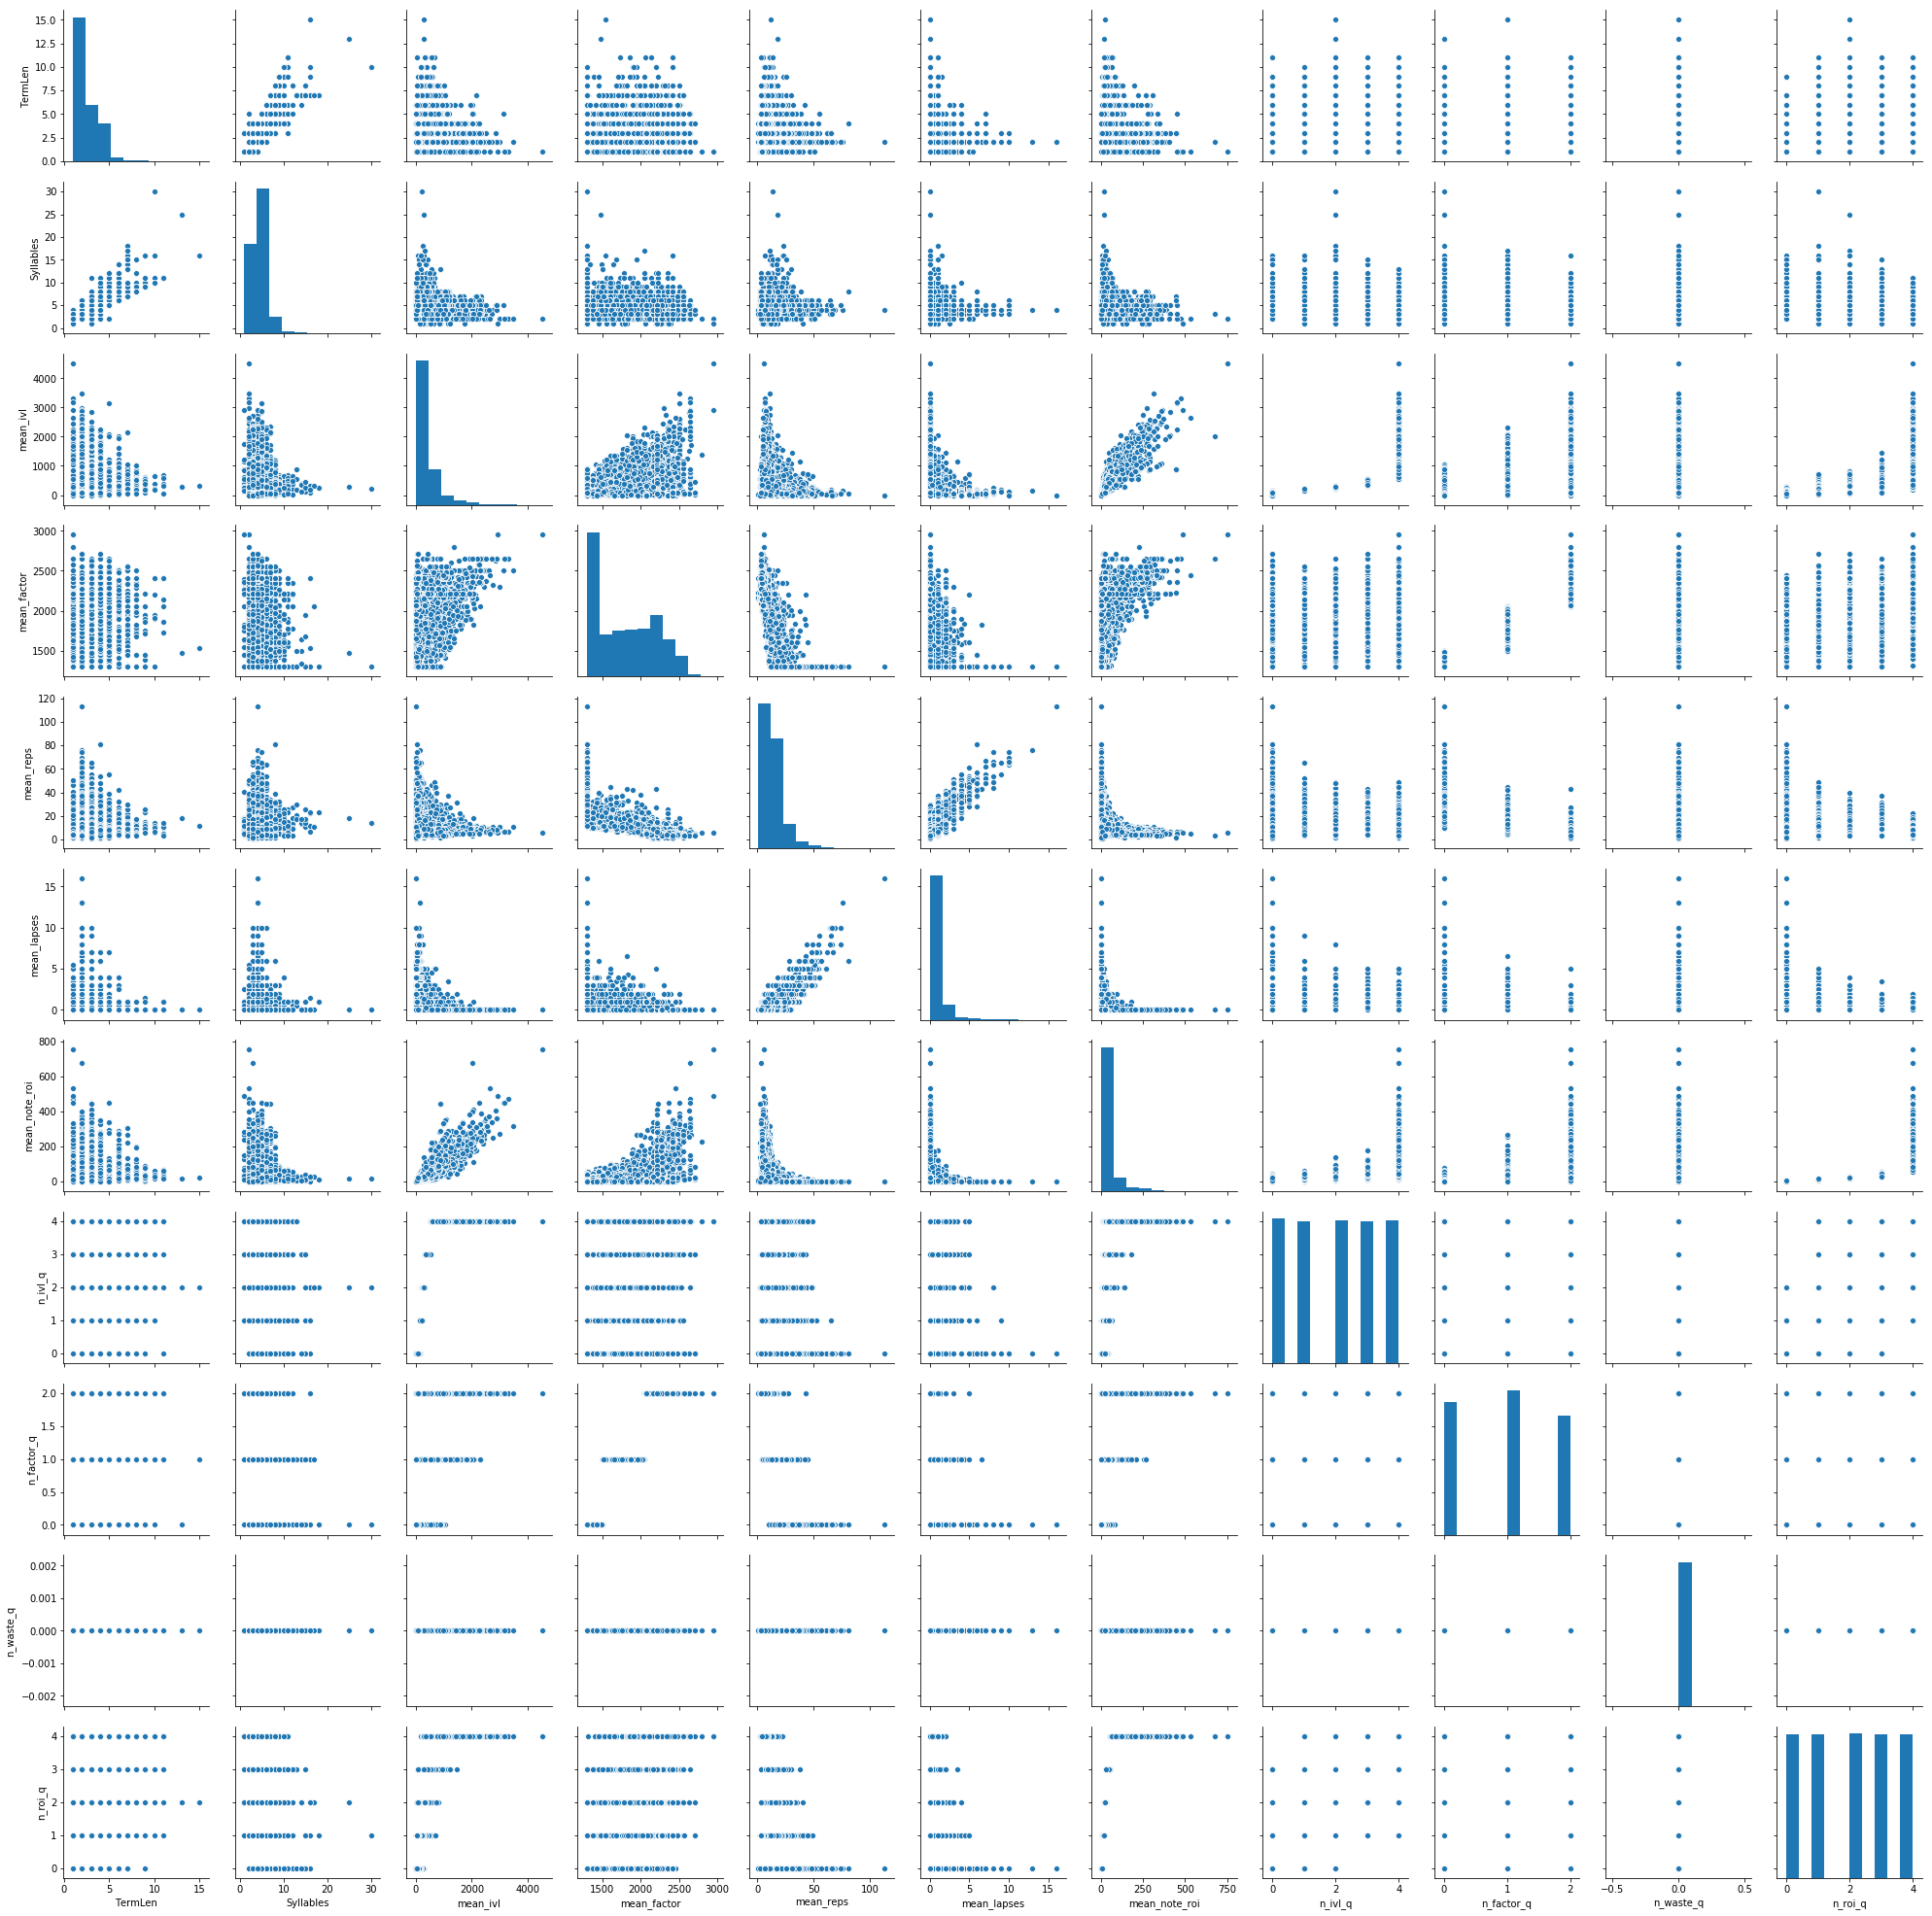

In [383]:
# Basic correlogram
sns.pairplot(df_notes_n_corr)
plt.show()

# Intitial Analysis

There appears to be a linear relationship between lapses & reps. It appears that lapses incur a cost of increasing reps. However, this info isn't directly actionable - one cannot simply just 'not forget'. The primary focus is what can be done to minimize lapses while not sacrificing efficiency (long intervals for few reps, and lapses as close as possible to 0).

# Topical Analysis

After doing some basic assessments of the data, we can dig a bit deeper:
- Is there a correlation between words having multiple readings ("yomi") and their forget rate\*?
- Is there a correlation between words having same/similar sounding words and their forget rate\*?
- What might the effect of word length be on memorability? \*\*, \*\*\*

> \* Forget rate can be understand as a multitude of things, such as the ratio between lapses & reps, as well as the raw lapse count, the average interval, and other numbers/ratios to be determined. I will attempt to clarify this in the process.  
\*\* Memorability being loosely correlated with forget rate, where memorability could be understood as a word/term's intrinsic "stickiness" in the brain, as opposed to an individual or collective's capacity to keep words/terms in their head. Sources pending.  
\*\*\* A huge caveat here being that, this dataset has a sample size of 1 (for both student and language), so all observations, interpretations, and understandings must be taken with more than a few grains of salt (and tested further with larger sample sizes, of at least 200 students, and 5 or more languages).

# Further Analysis

For a deeper understanding of what it means to aquire new terminology, the researcher believes it best to conduct analysis on term acquisition by merging multiple vectors (individual cards) of a single term into single entries, where dummy values for each vector (such as review count, lapse count, etc.) are encoded per entry. This would enable inspection and correlation analysis of:
- total reviews per term
- average ratio of reviews per term per vector (look vs hear vs recall vs read)
- where lapses are most likely to occur (per word, per vector, etc.)
- how word length, presence of kanji, katakana, hirgana, or combination thereof, may affect the above counts & ratios

# Further Information

The Spaced Repetition Software (\"SRS\") used for the study of Japanese by student \"A\" is an open souce program called Anki. The algorithm used by it to \"graduate\" (also refered to as \"maturing\") study items (called cards) so that subsequent reviews/practices will be spaced into the future is referred to as SM-2. [Please click here for more information on the SM-2 algorithm used in Anki.]("https://apps.ankiweb.net/docs/manual.html#what-algorithm")